In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('modified_data.csv')

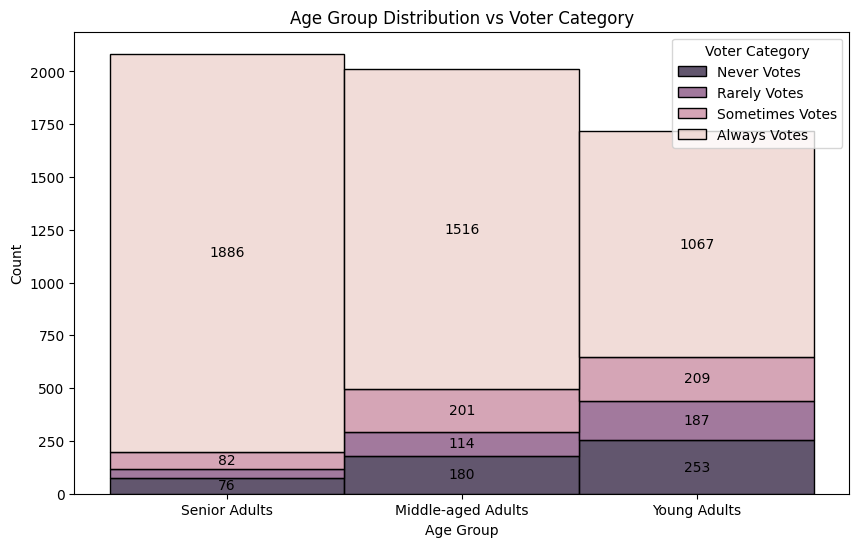

In [79]:
# plot histogram for Age_grp with Q24
temp = data[data['Q24'] != -1]
plt.figure(figsize=(10, 6))
sns_hist  = sns.histplot(data=temp, x='Age_grp', hue='Q24', multiple='stack')
# set data labels
plt.legend(title='Voter Category', labels=['Never Votes', 'Rarely Votes','Sometimes Votes', 'Always Votes'])
plt.title('Age Group Distribution vs Voter Category')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Annotate each section with data values
for p in sns_hist.patches:
    height = p.get_height()
    if height > 50:
        plt.annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2., height/2+p.get_y()),
                     va = 'center', ha = 'center',)
plt.savefig('./Topic charts/topic-1.png', dpi=300, bbox_inches='tight')
plt.show()

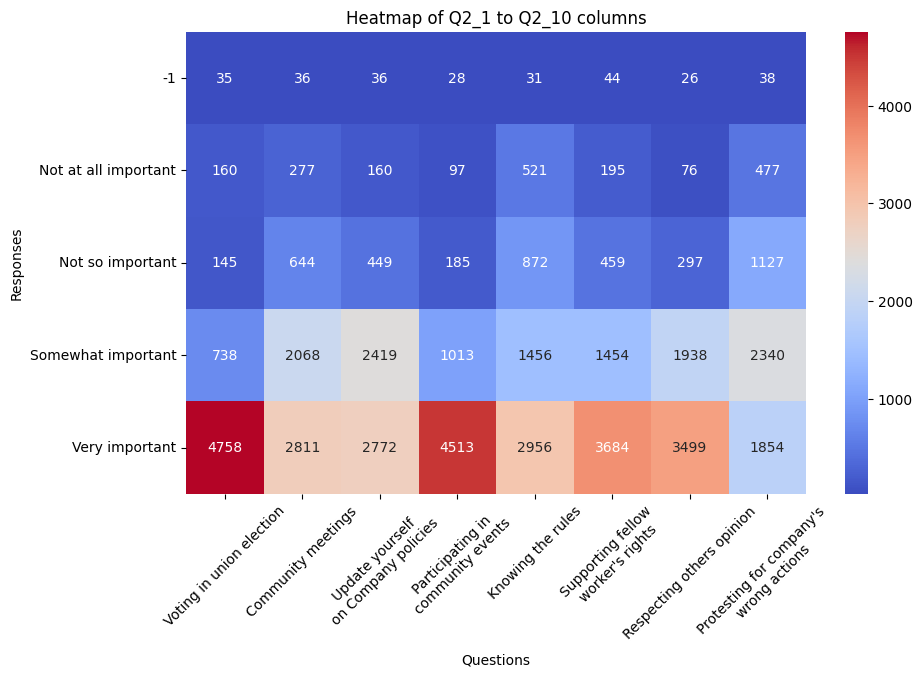

In [64]:
# plot heatmap for Q2_1 to Q2_10 columns
q2_columns = ['Q2_1', 'Q2_2', 'Q2_3', 'Q2_5',
              'Q2_6', 'Q2_7', 'Q2_8', 'Q2_10']

pivot_table = data[q2_columns].apply(pd.Series.value_counts).fillna(0)

temp = data[data[q2_columns] != -1]
plt.figure(figsize=(10, 6))
sns_heatmap = sns.heatmap(pivot_table, annot=True, fmt='g', cmap='coolwarm')
plt.title('Heatmap of Q2_1 to Q2_10 columns')
plt.xlabel('Questions')
plt.ylabel('Responses')

# Set the x-axis labels
sns_heatmap.set_xticklabels(['Voting in union election', 'Community meetings', 'Update yourself\non Company policies',
                             'Participating in\ncommunity events', 'Knowing the rules',
                             "Supporting fellow\nworker's rights", 'Respecting others opinion', 
                             "Protesting for company's\nwrong actions"],
                            rotation=45, ha='center')

plt.savefig('./Topic charts/Q-2.png', dpi=300, bbox_inches='tight')